In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
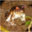

In [4]:
x_train[0]

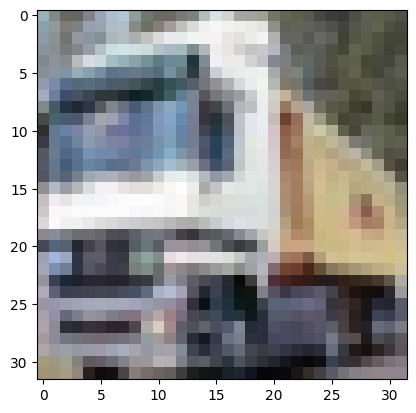

In [5]:
plt.imshow(x_train[1])

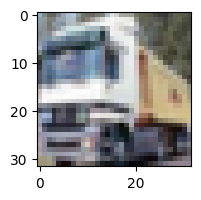

In [6]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1,)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
 def plot_sample(X,y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

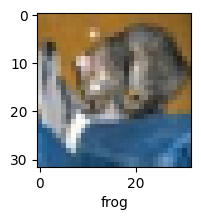

In [18]:
plot_sample(x_train, y_train, 0)

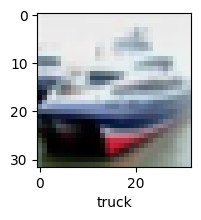

In [19]:
plot_sample(x_train, y_train, 1)

In [22]:
 x_train = x_train /255
 x_test = x_test /255

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train ,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 17s 9ms/step - loss: nan - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000


In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [32]:
 cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 2.0892 - accuracy: 0.3335
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4031 - accuracy: 0.4964
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2237 - accuracy: 0.5701
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0853 - accuracy: 0.6222
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9852 - accuracy: 0.6568
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8995 - accuracy: 0.6895
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8272 - accuracy: 0.7128
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7637 - accuracy: 0.7358
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7127 - accuracy: 0.7511
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.67

In [33]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1905 - accuracy: 0.6507


[1.1905195713043213, 0.6506999731063843]

In [34]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [35]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.40909192e-03, 3.61470098e-04, 1.03403013e-02, 5.39506853e-01,
        1.51917767e-02, 3.98590654e-01, 2.12825295e-02, 1.12081515e-02,
        6.37196936e-04, 4.71907260e-04],
       [8.86263791e-03, 5.11691153e-01, 1.46998776e-04, 4.45770775e-06,
        3.64545940e-07, 1.38846735e-06, 7.80567632e-07, 1.32042885e-07,
        4.76185948e-01, 3.10619269e-03],
       [7.22737089e-02, 6.81679785e-01, 1.11883075e-03, 7.74470856e-04,
        2.37766159e-04, 2.47516902e-04, 6.22236330e-05, 5.12268802e-04,
        2.13239808e-02, 2.21769482e-01],
       [6.48182690e-01, 5.53672609e-04, 4.39325161e-03, 1.61841570e-03,
        2.46092588e-01, 2.79496628e-04, 1.62895129e-04, 1.85256195e-03,
        9.66840908e-02, 1.80398434e-04],
       [9.87976455e-05, 9.53276594e-06, 8.04363657e-03, 8.73156078e-03,
        1.21328816e-01, 8.36450956e-04, 8.60915303e-01, 3.04084497e-05,
        4.22357698e-06, 1.27768203e-06]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 1, 1, 0, 6, 6, 5, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [37]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

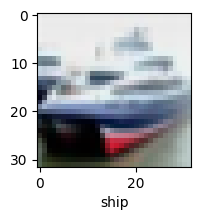

In [38]:
plot_sample(x_test, y_test, 1)

In [39]:
classes[y_classes[1]]

'automobile'

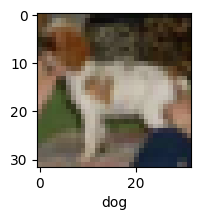

In [40]:
plot_sample(x_test, y_test, 12)

In [41]:
classes[y_classes[12]]

'dog'

In [42]:
print("classification report: \n", classification_report(y_test, y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.71      1000
           1       0.81      0.76      0.78      1000
           2       0.65      0.41      0.50      1000
           3       0.52      0.38      0.44      1000
           4       0.52      0.61      0.56      1000
           5       0.57      0.57      0.57      1000
           6       0.62      0.81      0.70      1000
           7       0.61      0.77      0.68      1000
           8       0.80      0.73      0.76      1000
           9       0.71      0.77      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

